In [1]:
import GPy
import numpy as np
from scipy.stats import multivariate_normal

In [59]:

x = np.linspace(0,1,100)[:,None]
k = GPy.kern.Matern32(1, lengthscale=1)+GPy.kern.White(1, variance=0.000001)
K = k.K(x)
f_samples = np.random.multivariate_normal(np.zeros(x.size), K, 20)
rank_full=np.argsort(multivariate_normal.logpdf(f_samples, np.zeros(x.size), K))

thin = np.arange(0,x.size,2)
xthin = x[thin]
#k2 = k.copy()
Kthin = k.K(xthin)
f_thin = f_samples[:,thin]

rank_thin=np.argsort(multivariate_normal.logpdf(f_thin, np.zeros(xthin.size), Kthin))

print(rank_full)
print(rank_thin)
#n = rank_thin.size
#print(1-6 *np.sum(np.square(rank_full-rank_thin))/(n*(n**2-1)))

from scipy.stats import spearmanr
print(spearmanr(rank_full, rank_thin))


[17 13  6  7  3 16 11 15 12 19  2  5 10 14  0  9  4 18  8  1]
[ 7 17  3 14 11  6 13 15  2 16  5  9 19 18 12 10  8  4  1  0]
SpearmanrResult(correlation=0.26315789473684204, pvalue=0.26228712287542849)


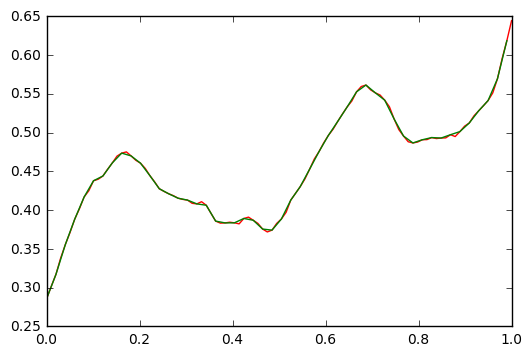

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, f_samples[0,:], 'r')
plt.plot(xthin, f_thin[0,:], 'g')

In [56]:
multivariate_normal.logpdf(np.zeros(x.size)+5, np.zeros(x.size), K)

425.62112156571743

In [57]:
multivariate_normal.logpdf(f_samples, np.zeros(x.size), K)

array([ 401.45051781,  403.40067931,  391.31705356,  387.84866684,
        386.86351171,  382.12102277,  389.08453724,  384.36085603,
        392.04903043,  397.08055864,  408.49744814,  394.09711788,
        403.18593865,  399.26473581,  382.99027545,  400.22660901,
        390.15563265,  394.26241758,  398.81871972,  389.73039774])